In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
print("Arshatha 212222230012")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

Arshatha 212222230012
11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
print("Arshatha 212222230012")
X_test.shape

Arshatha 212222230012


(10000, 28, 28)

In [ ]:
print("Arshatha 212222230012")
single_image= X_train[0]
single_image.shape

Arshatha 212222230012


(28, 28)

Arshatha 212222230012


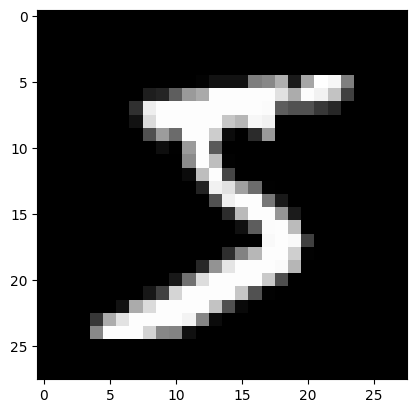

In [ ]:
print("Arshatha 212222230012")
plt.imshow(single_image,cmap='gray')

In [ ]:
print("Arshatha 212222230012")
y_train.shape

Arshatha 212222230012


(60000,)

In [ ]:
print("Arshatha 212222230012")
X_train.min()

Arshatha 212222230012


0

In [ ]:
print("Arshatha 212222230012")
X_train.max()

Arshatha 212222230012


255

In [ ]:
X_train_scaled = X_train/255.0

In [ ]:
X_test_scaled = X_test/255.0

In [ ]:
print("Arshatha 212222230012")
X_train_scaled.min()
X_train_scaled.max()

Arshatha 212222230012


1.0

In [ ]:
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)

In [ ]:
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)

In [ ]:
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
print("Arshatha 212222230012")
model.summary()

Arshatha 212222230012
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 20)                128020    
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                  

In [ ]:
print("Arshatha 212222230012")
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Arshatha 212222230012


In [ ]:
print("Arshatha 212222230012")
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Arshatha 212222230012
Epoch 1/5
938/938 [==============================] - 196s 208ms/step - loss: 0.2276 - accuracy: 0.9318 - val_loss: 0.0566 - val_accuracy: 0.9825
Epoch 2/5
938/938 [==============================] - 193s 206ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0423 - val_accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 189s 202ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 188s 201ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 5/5
938/938 [==============================] - 194s 207ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0321 - val_accuracy: 0.9902


In [ ]:
print("Arshatha 212222230012")
metrics = pd.DataFrame(model.history.history)

metrics.head()

Arshatha 212222230012


,loss,accuracy,val_loss,val_accuracy
0,0.227648,0.931817,0.056591,0.9825
1,0.051830,0.983917,0.042341,0.9867
2,0.035883,0.989233,0.037932,0.9886
3,0.026759,0.991533,0.039126,0.9880
4,0.022058,0.993117,0.032135,0.9902


Arshatha 212222230012


<Axes: >

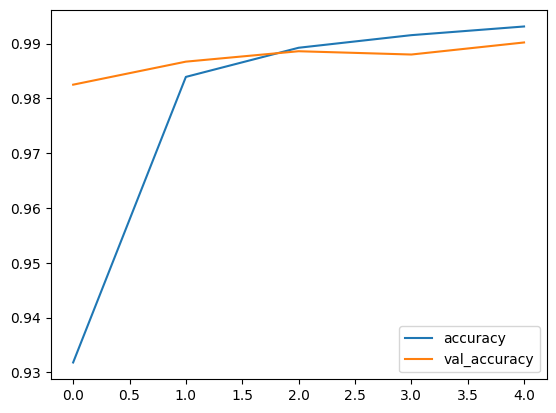

In [ ]:
print("Arshatha 212222230012")
metrics[['accuracy','val_accuracy']].plot()

Arshatha 212222230012


<Axes: >

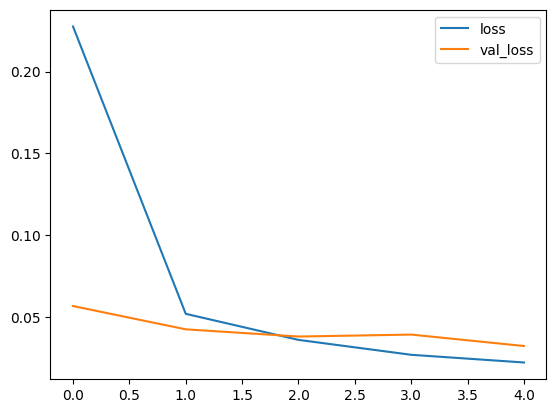

In [ ]:
print("Arshatha 212222230012")
metrics[['loss','val_loss']].plot()

In [ ]:
print("Arshatha 212222230012")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

Arshatha 212222230012
313/313 [==============================] - 17s 55ms/step


In [ ]:
print("Arshatha 212222230012")
print(confusion_matrix(y_test,x_test_predictions))

Arshatha 212222230012
[[ 976    0    2    0    0    0    1    1    0    0]
 [   0 1128    1    6    0    0    0    0    0    0]
 [   0    0 1023    3    1    0    0    5    0    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   0    0    1    0  972    0    1    1    1    6]
 [   0    0    0   10    0  881    1    0    0    0]
 [   3    2    1    0    2    2  946    0    2    0]
 [   0    1    3    1    0    0    0 1021    0    2]
 [   3    0    0    6    0    3    1    1  955    5]
 [   0    0    0    2    2    9    0    2    1  993]]


In [ ]:
print("Arshatha 212222230012")
print(classification_report(y_test,x_test_predictions))

Arshatha 212222230012
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print("Arshatha 212222230012")
img = image.load_img('img_3.png')
type(img)

Arshatha 212222230012


PIL.Image.Image

In [ ]:
img = image.load_img('img_3.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(x_single_prediction)

[5]


Arshatha 212222230012


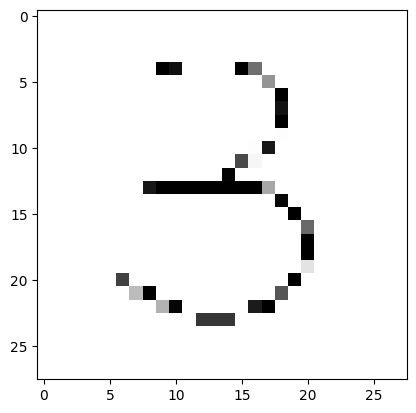

In [ ]:
print("Arshatha 212222230012")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print("Arshatha 212222230012")
print(x_single_prediction)

Arshatha 212222230012
[3]
